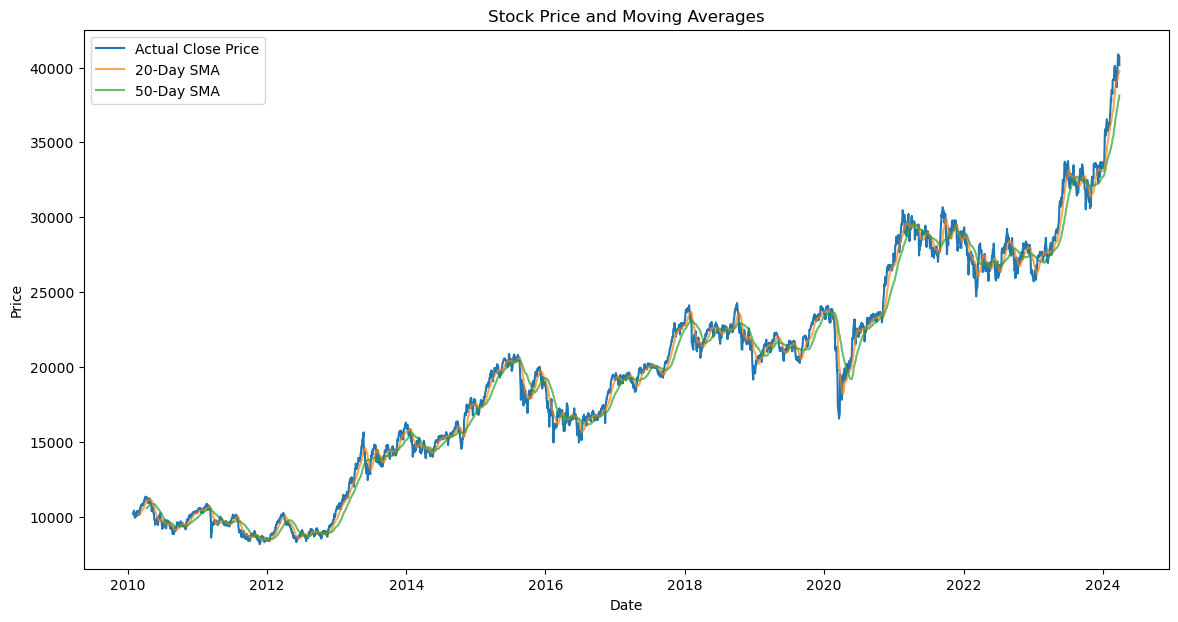

In [54]:
# 短期移動平均（20日）
df['SMA_20'] = df['Close'].rolling(window=20).mean()

# 長期移動平均（50日）
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# 移動平均と実際の株価をプロット
plt.figure(figsize=(14, 7))#プロットのサイズを指定
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(df['SMA_20'], label='20-Day SMA', alpha=0.7)#20日移動平均をプロット、alpha=0.7 は透明度を指定
plt.plot(df['SMA_50'], label='50-Day SMA', alpha=0.7)
plt.title('Stock Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

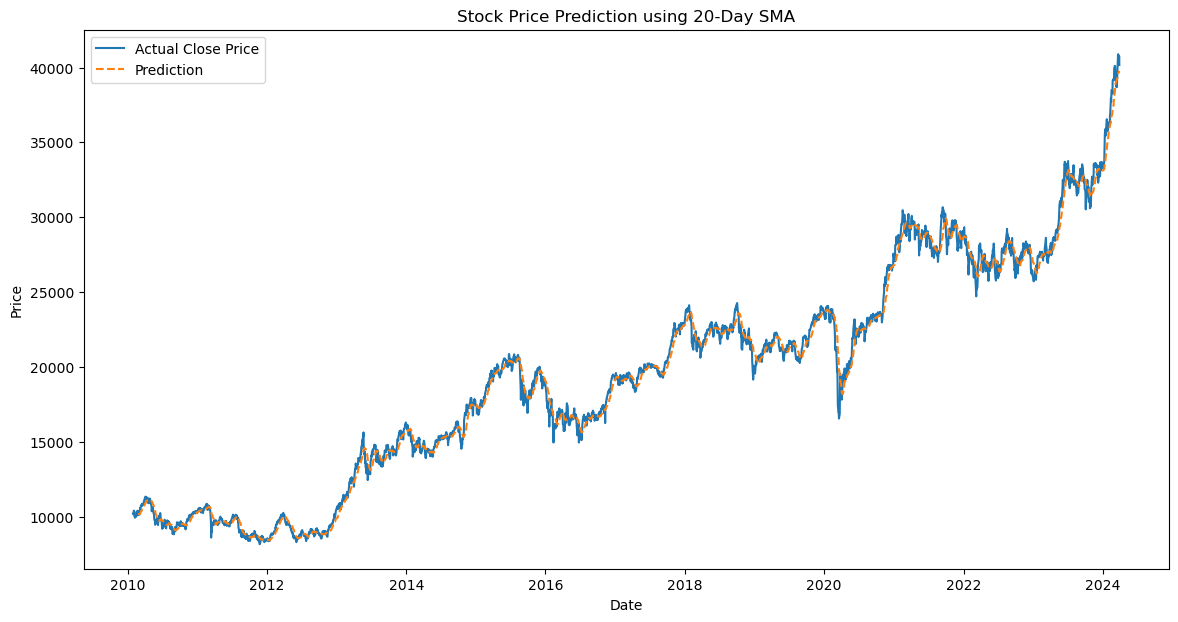

In [55]:
# 移動平均を使った予測（20日移動平均）
df['Prediction'] = df['SMA_20'].shift(-1)

# データをプロット
plt.figure(figsize=(14, 7))
plt.plot(df['Close'], label='Actual Close Price')
plt.plot(df['Prediction'], label='Prediction', linestyle='--')
plt.title('Stock Price Prediction using 20-Day SMA')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error


# シンプルな予測モデルの実装
# 予測値と実際の値の対応を取るためにNaNを削除
df = df.dropna(subset=['Prediction'])

# 実際の値と予測値
actual = df['Close']
predicted = df['Prediction']

# MSE（平均二乗誤差）を計算
mse = mean_squared_error(actual, predicted)
print(f'Mean Squared Error: {mse:.2f}')
#移動平均を使った株価予測は、シンプルで実装が容易な手法です。以下のポイントに留意してください：
#データの期間: 短期移動平均と長期移動平均の期間は、予測の目的に応じて調整します。
#予測の限界: 移動平均は過去のデータに基づくため、大きな市場変動や異常値には対応しにくいことがあります。
#モデルの複雑化: より精度の高い予測を行うためには、他の予測手法と組み合わせることを検討してください（例えば、ARIMAやLSTMなど）。
#移動平均を使った基本的な予測手法を理解したら、他の手法や特徴量を追加することで、より精度の高いモデルに発展させることができます。